L1正则化是指权值向量 
 中各个元素的绝对值之和，通常表示为 
L2正则化是指权值向量 
 中各个元素的平方和然后再求平方根（可以看到Ridge回归的L2正则化项有平方符号），通常表示为
 
L1/L2正则化的用处
L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择。
L2正则化可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合。

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
data=load_breast_cancer()
print(data.keys())
print(data['DESCR'])
print(data['data'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [45]:
X=data['data']
y=data['target']
print(X.shape)
print(y)

(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 

D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda\envs\pylearn\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

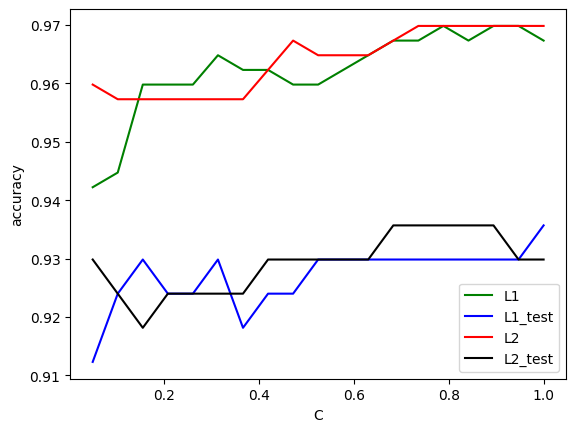

In [50]:
l1=[] #在l1训练集上的准确率
l1_test=[] #在l1测试集上的准确率
l2=[] #在l2训练集上的准确率
l2_test=[] #在l2测试集上的准确率

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    LR1=LogisticRegression(penalty='l1',C=i,solver='liblinear')
    LR2=LogisticRegression(penalty='l2',C=i,solver='liblinear')
    
    LR1.fit(X_train,y_train)
    LR2.fit(X_train,y_train)
    
    l1.append(accuracy_score(y_train,LR1.predict(X_train)))
    l1_test.append(accuracy_score(y_test,LR1.predict(X_test)))
    l2.append(accuracy_score(y_train,LR2.predict(X_train)))
    l2_test.append(accuracy_score(y_test,LR2.predict(X_test)))
    
graphs=[l1,l1_test,l2,l2_test]
colors=['g','b','r','k']
label=['L1','L1_test','L2','L2_test']
for i in range(len(graphs)):
    plt.plot(np.linspace(0.05,1,19),graphs[i],colors[i],label=label[i])
plt.legend()
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()